#**UTS MACHINE LEARNING**


*   NAMA : KINANTI ANGGRAENI
*   NIM : 4112322010



#**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# **Data**

## Collecting Data

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/data_training.csv')
data_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918


## Data Information

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


In [ ]:
data_train.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,857.000000,8.261960,1.701992,4.600000,7.100000,7.900000,9.100000,15.600000
volatile acidity,857.000000,0.529393,0.179162,0.120000,0.395000,0.520000,0.640000,1.580000
citric acid,857.000000,0.267351,0.195144,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,857.000000,2.506184,1.293512,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,857.000000,0.086830,0.048721,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,857.000000,15.782964,10.300402,1.000000,7.000000,14.000000,21.000000,68.000000
total sulfur dioxide,857.000000,45.978413,31.692113,6.000000,21.000000,38.000000,63.000000,278.000000
density,857.000000,0.996692,0.001901,0.990070,0.995520,0.996680,0.997800,1.003200
pH,857.000000,3.313092,0.152079,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,857.000000,0.656709,0.167364,0.390000,0.550000,0.620000,0.730000,2.000000


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">
    
<h2 style='border:0; border-radius: 15px; font-weight: 800; color:#9b006e; font-size:280%'><center> Attribute Information
</center></h2>

|Feature|Penjelasan|
|-------|-------|
|**fixed acidity**|Kadar asam-asam tidak mudah menguap yang terdapat dalam anggur|
|**volatile acidity**|Jumlah asam asetat dalam anggur|
|**citric acid**|Jumlah asam sitrat dalam anggur|
|**residual sugar**|Jumlah gula yang tersisa setelah proses fermentasi berhenti|
|**chlorides**|Kadar garam dalam anggur|
|**free sulfur dioxide**|Jumlah sulfur dioksida dalam bentuk bebas dalam anggur.|
|**total sulfur dioxide**|Jumlah total sulfur dioksida dalam anggur, termasuk bentuk bebas dan terikat.|
|**density**|Ukuran seberapa padat suatu zat dikemas.|
|**PH**|Ukuran tingkat keasaman atau kebasaan anggur pada skala 0 (sangat asam) hingga 14 (sangat basa).; sebagian anggur memiliki pH 3-4|
|**sulphates**|Jumlah garam asam sulfat dalam anggur. |
|**Alcohol**|Persentase kandungan alkohol dalam anggur berdasarkan volume|
|**quality**|Variabel target atau output yang menunjukkan kualitas anggur berdasarkan data sensorik|
|**ID**|Nomor unik yang digunakan untuk mengidentifikasi setiap sampel data secara individual|



# **Data Preprocessing**

## Missing Values Handling

In [ ]:
data_train.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


✅tidak terdapat missing values

## Visualization and Plots

In [ ]:
data_train.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

.rename() agar nama-nama kolom lebih bersih, Pythonic, dan siap dipakai untuk analisis

In [ ]:
columns = list(data_train.columns)

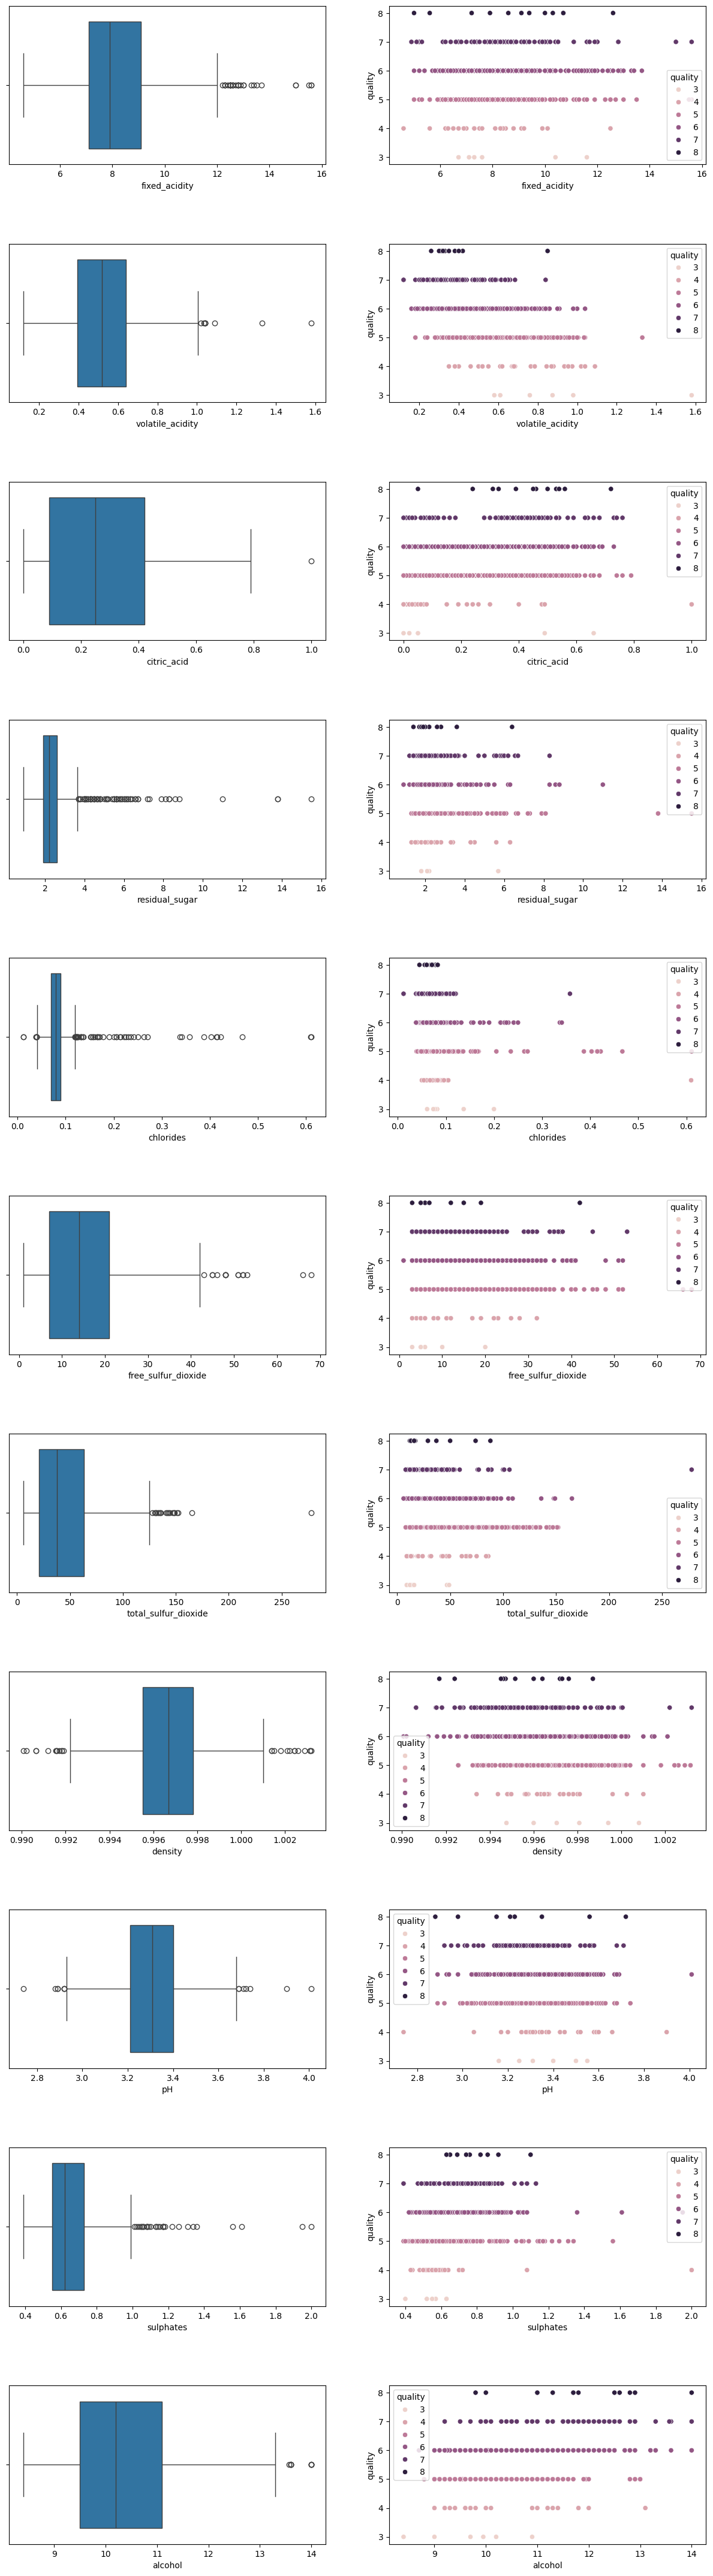

In [ ]:
columns = [col for col in data_train.columns if col not in ['quality', 'Id']]

fig, ax = plt.subplots(len(columns), 2, figsize=(15, 5 * len(columns)))
plt.subplots_adjust(hspace=0.5)

for i in range(len(columns)):
    sns.boxplot(x=columns[i], data=data_train, ax=ax[i, 0])
    sns.scatterplot(x=columns[i], y='quality', data=data_train, hue='quality', ax=ax[i, 1])


##Insight Per Fitur

**1. Fixed Acidity**
- Banyak outlier di atas 11.
- Tidak terlihat tren jelas terhadap quality, distribusi rata.

**2. Volatile Acidity**
- Terlihat tren negatif: nilai rendah cenderung memiliki kualitas tinggi.
- Kualitas 7–8 terkumpul di volatile_acidity rendah

**3. Citric Acid**
- Kualitas 7–8 banyak muncul di nilai citric_acid tinggi → korelasi positif terlihat.

**4. Residual Sugar**
- Banyak outlier.
- Distribusi terhadap quality cukup flat, sedikit pengaruh (konfirmasi juga di heatmap).

**5. Chlorides**
- Banyak outlier tinggi, terutama >0.2.
- Kualitas tinggi lebih banyak muncul pada nilai rendah

**6. Free Sulfur Dioxide & Total Sulfur Dioxide**
- Banyak outlier.
- Distribusinya terhadap quality cenderung menyebar → pengaruh kecil

**7. Density**
- Terdistribusi ketat (range kecil), tapi terlihat tren: kualitas tinggi condong ke density rendah → korelasi negatif.

**8. pH**
- Tidak banyak outlier.
- Tidak terlalu terlihat tren jelas terhadap quality.

**9. Sulphates**
- Terlihat: kualitas tinggi muncul lebih banyak di sulphates tinggi → korelasi positif lemah ke sedang.

**10. Alcohol**
- Kualitas 7–8 dominan pada nilai alkohol tinggi
- Ini sangat konsisten dengan korelasi +0.47 → fitur paling signifikan

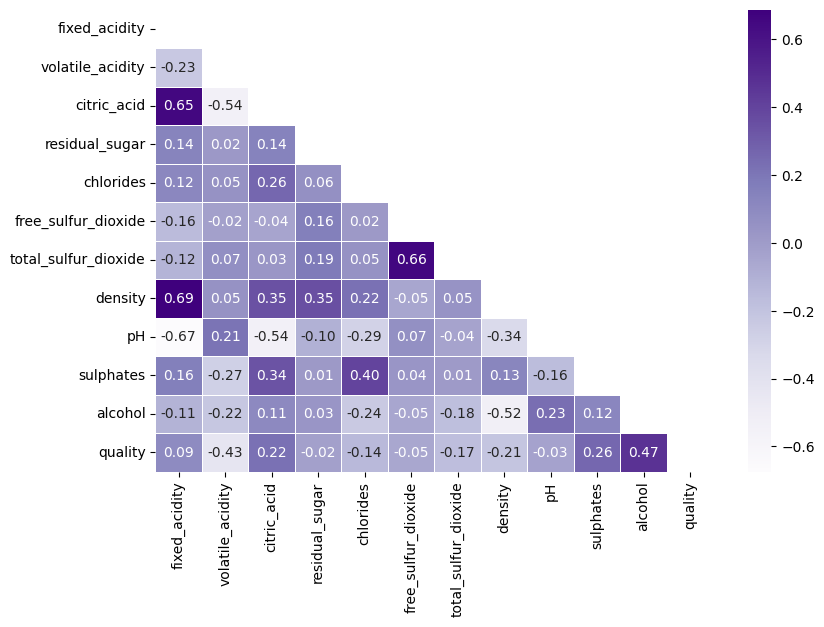

In [ ]:
corr = data_train.drop(columns='Id').corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

## Analisis Plots

➡️Korelasi Terkuat terhadap quality:

- alcohol → 0.47

konsisten dengan hasil visualisasi sebelumnya, semakin tinggi kandungan alkohol, cenderung semakin tinggi kualitas anggur.

- volatile acidity → -0.43

semakin tinggi tingkat keasaman volatil, kualitas cenderung menurun.

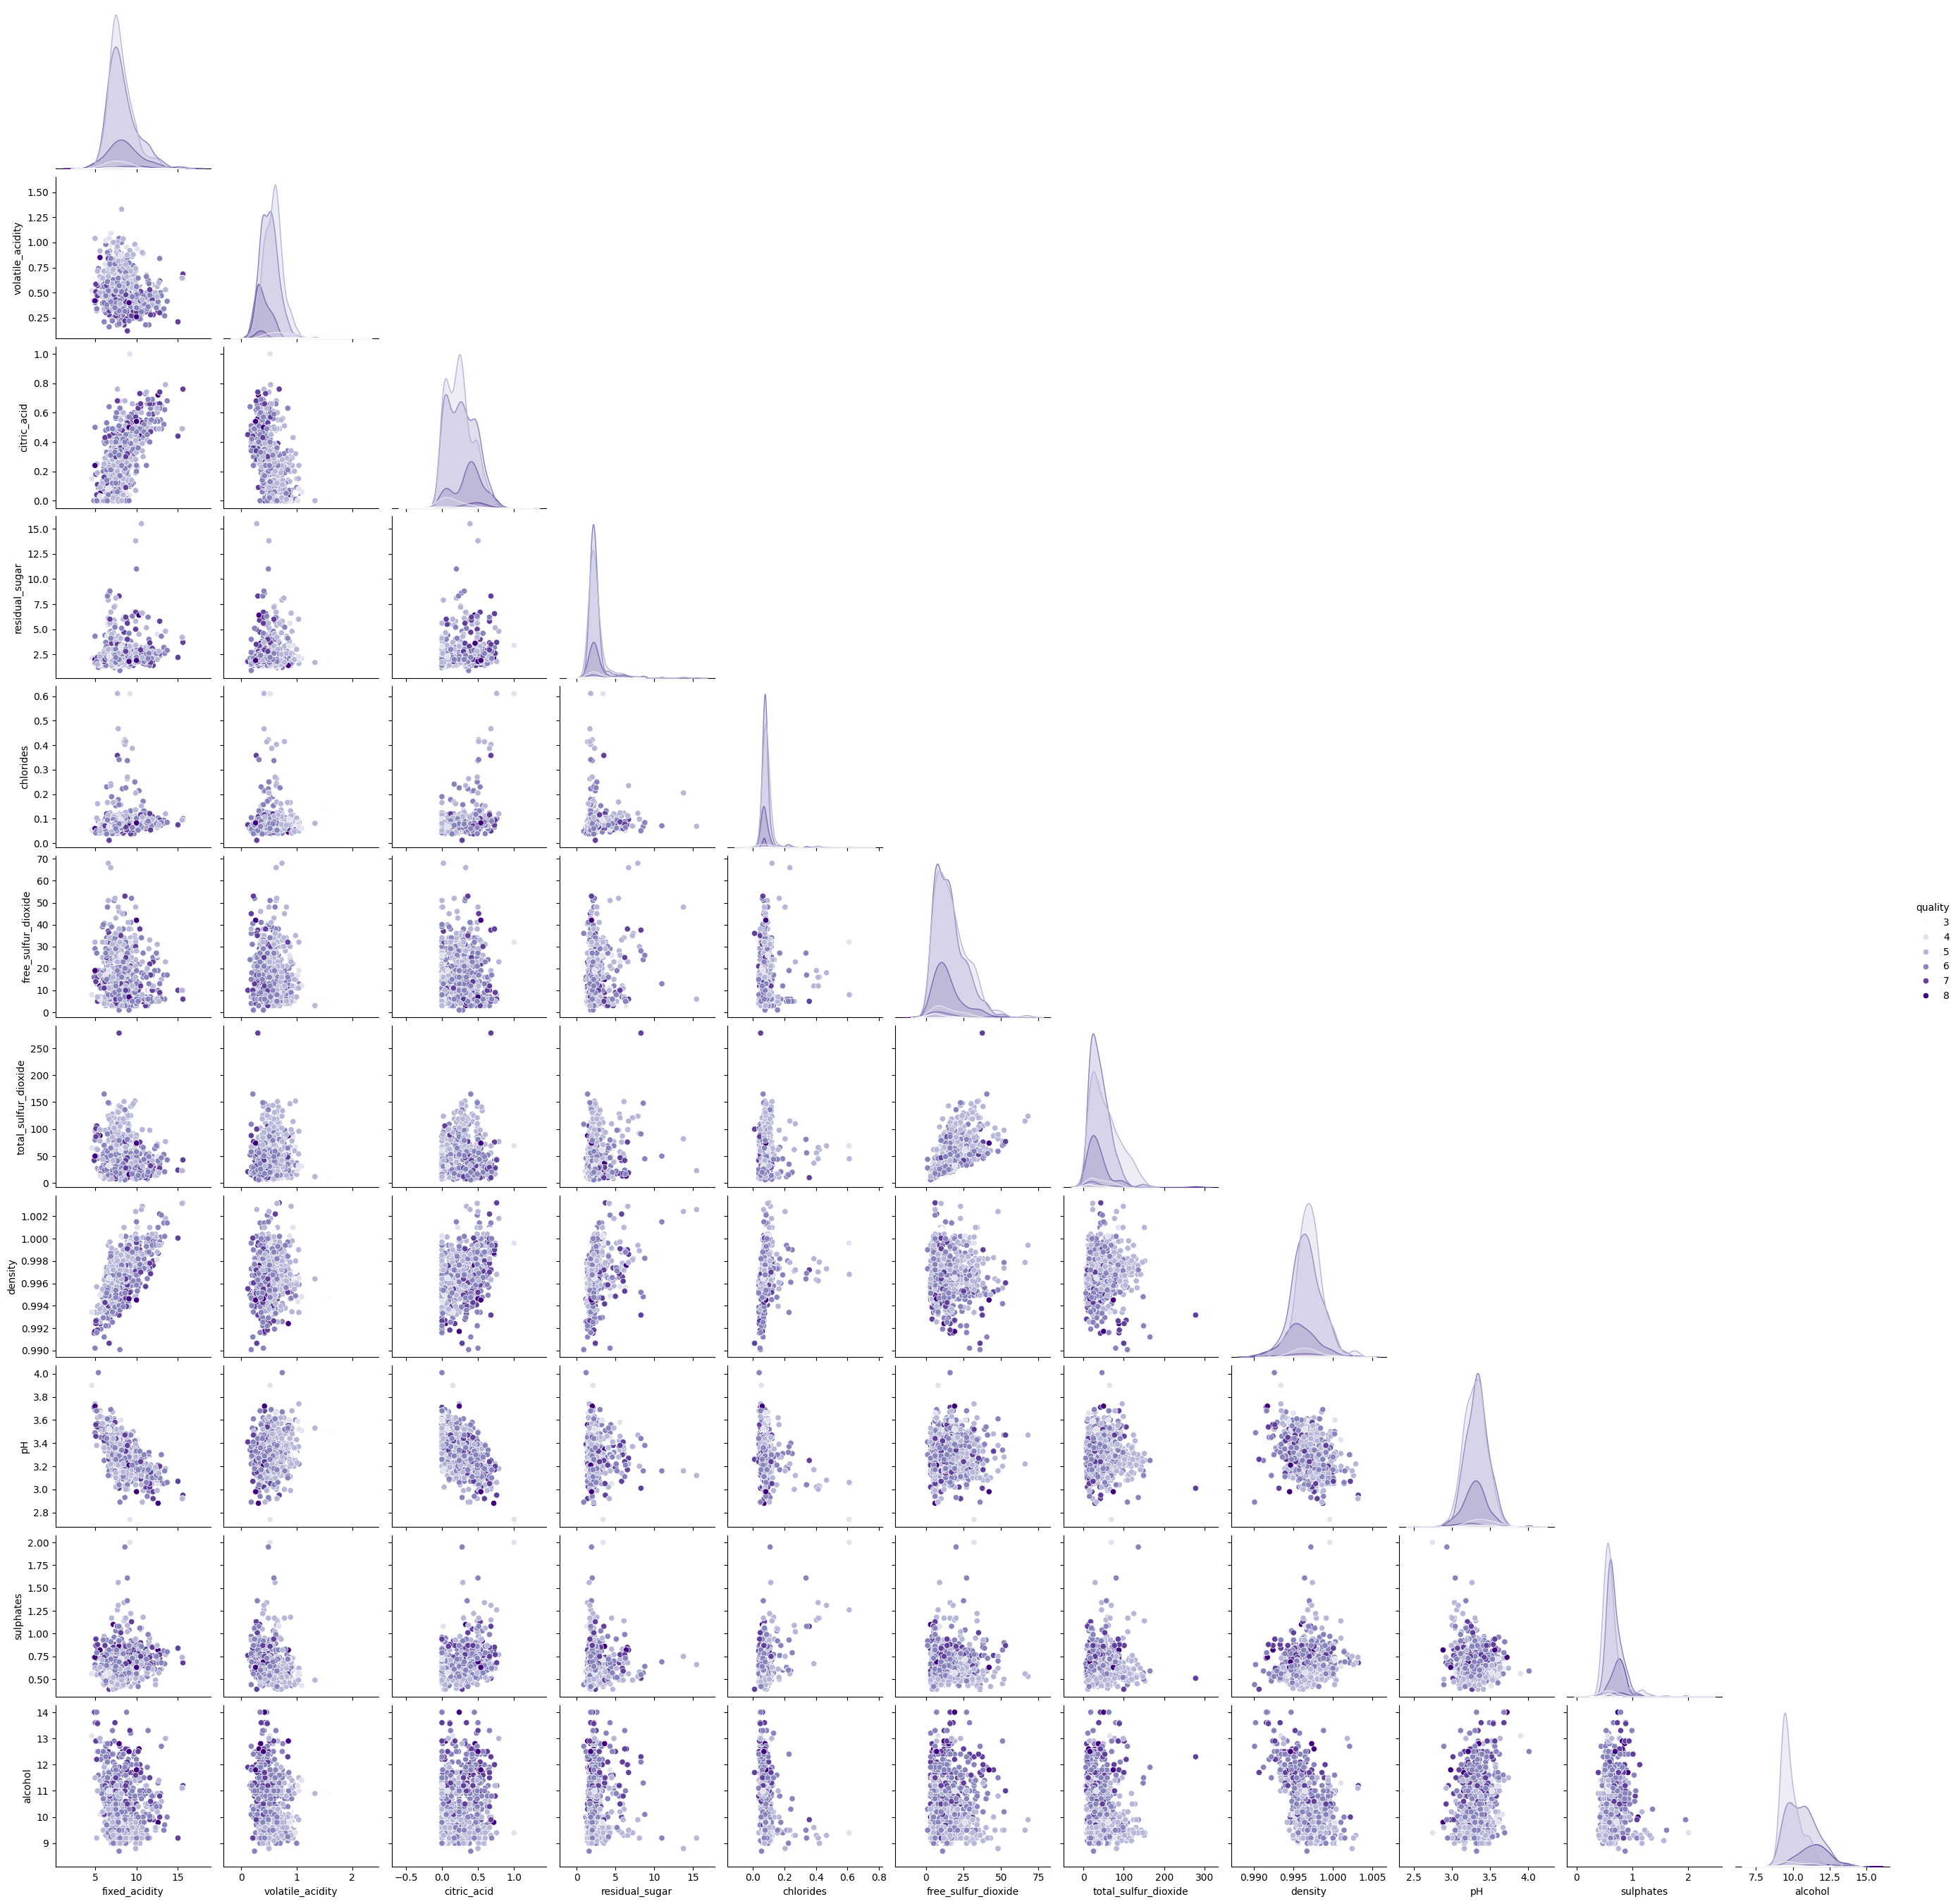

In [ ]:
sns.pairplot(data_train.drop(columns='Id'), hue='quality', corner=True, palette='Purples')

## Target Categorizing


In [ ]:
data_train.quality.unique()

array([5, 7, 6, 4, 8, 3])

## Normalization

In [ ]:
X_temp = data_train.drop(columns=['quality', 'Id'])
y = data_train['quality']

➡️ menormalisasi data X menggunakan MinMaxScaler dengan rentang [0, 1] untuk menskalakan semua fitur numerik dalam dataset

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T.style.background_gradient(axis=0, cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,857.000000,0.332905,0.154727,0.000000,0.227273,0.300000,0.409091,1.000000
volatile_acidity,857.000000,0.280406,0.122714,0.000000,0.188356,0.273973,0.356164,1.000000
citric_acid,857.000000,0.267351,0.195144,0.000000,0.090000,0.250000,0.420000,1.000000
residual_sugar,857.000000,0.110013,0.088597,0.000000,0.068493,0.089041,0.116438,1.000000
chlorides,857.000000,0.124924,0.081336,0.000000,0.096828,0.111853,0.130217,1.000000
free_sulfur_dioxide,857.000000,0.220641,0.153737,0.000000,0.089552,0.194030,0.298507,1.000000
total_sulfur_dioxide,857.000000,0.146979,0.116515,0.000000,0.055147,0.117647,0.209559,1.000000
density,857.000000,0.504322,0.144801,0.000000,0.415080,0.503427,0.588728,1.000000
pH,857.000000,0.451254,0.119747,0.000000,0.370079,0.448819,0.519685,1.000000
sulphates,857.000000,0.165658,0.103953,0.000000,0.099379,0.142857,0.211180,1.000000


#**Modeling**

## Initialization

In [ ]:
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Purples")
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(y_test.unique())
    ax.yaxis.set_ticklabels(y_test.unique())
    plt.show()

In [ ]:
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [ ]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Purples", ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)

    unique_labels = sorted(set(y_test.unique()) | set(y_pred))

    ax[0].xaxis.set_ticklabels(unique_labels)
    ax[0].yaxis.set_ticklabels(unique_labels)

    ax[1] = sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [ ]:
data_train.quality.value_counts()

,count
quality,
5,362
6,341
7,109
4,26
8,13
3,6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## RandomForestClassifier

In [ ]:
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=6, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}
accuracy :  0.6423976608187134


In [ ]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.715


In [ ]:
y_test.value_counts()

,count
quality,
5,80
6,68
7,19
8,3
4,2


tidak ada satupun data dengan label 3 di y_test

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


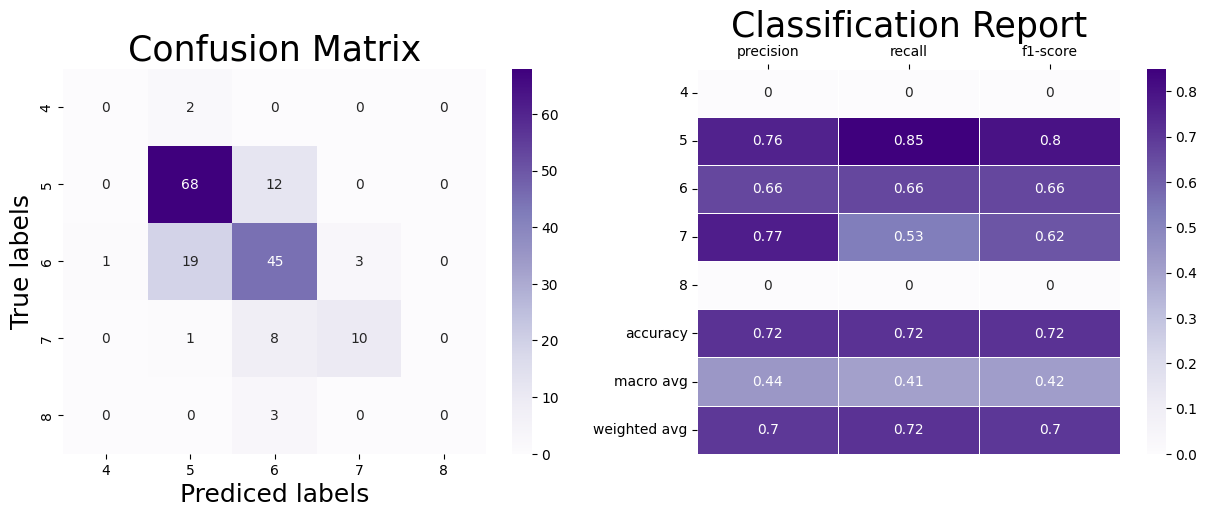

In [ ]:
clf_plot(y_pred_rf)

**Evaluasi Confusion Matrix**

- 5 benar 67 → (13 salah ke kelas 6)
- 6	benar 46 → (19 salah ke 5, 3 salah ke 7)
- 7 benar 9	 → (9 salah ke 6, 1 salah ke 5)
- 4 benar 0  → (2 salah ke kelas 5)
- 8	benar 0 → (2 salah ke kelas 6, 1 salah ke kelas 7)

**Kinerja Umum Model**

- Akurasi keseluruhan: 70,9%

Model memiliki performa yang cukup baik secara keseluruhan, dengan 70,9% prediksi yang benar.

- Macro avg dan Weighted avg f1-score:

1. Macro avg: 0.4 → Rendah, menunjukkan ketidakseimbangan performa antar kelas.

2. Weighted avg: 0.69 → Lebih tinggi karena kelas dominan (misalnya label 5 dan 6) memiliki performa yang baik dan bobot yang besar.

## KNeighborsClassifier

In [ ]:
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=6, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': np.int64(23), 'p': 2, 'weights': 'distance'}
accuracy :  0.6452707856598018


In [ ]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.61


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


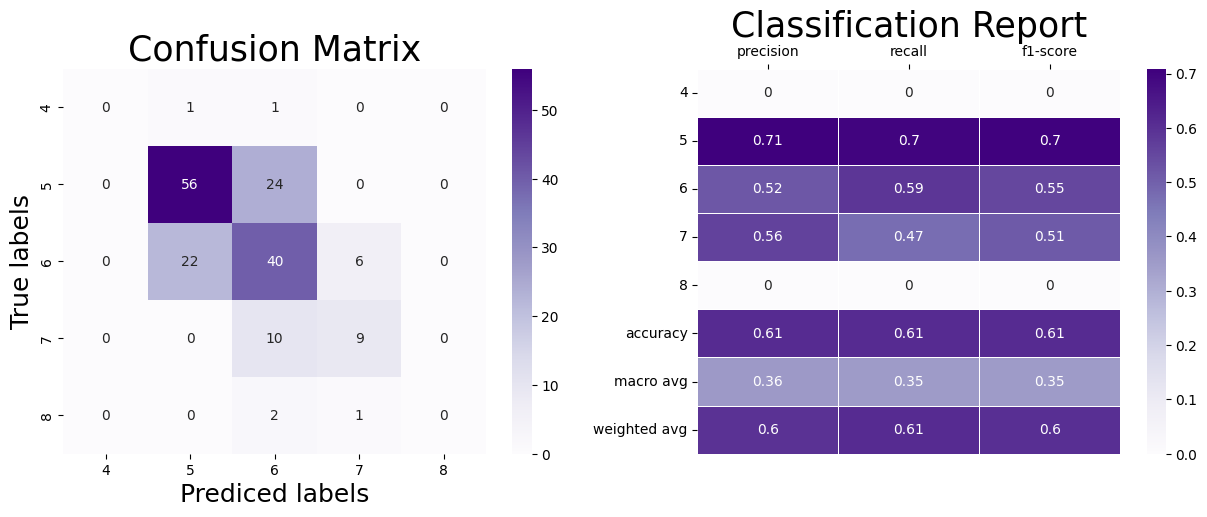

In [ ]:
clf_plot(y_pred_knn)

**Evaluasi Confusion Matrix**

- 5 benar 56 → (24 salah ke kelas 6)
- 6	benar 40 → (22 salah ke 5, 6 salah ke 7)
- 7 benar 9	 → (10 salah ke 6)
- 4 & 8	Jumlah sangat kecil → Prediksi salah semua

**Classification Report**

- Kelas 5 diprediksi paling baik (precision, recall, dan f1 tinggi).
- Kelas 4 dan 8 gagal dikenali — kemungkinan besar karena sangat sedikit datanya.
- F1-score macro average rendah (0.35) → artinya secara rata-rata model buruk pada kelas minoritas.
- Weighted avg lebih tinggi (0.60) karena kelas mayoritas lebih dominan dan lebih mudah diprediksi.

## DecisionTreeClassifier

In [ ]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=6, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': np.int64(17), 'splitter': 'random'}
accuracy :  0.5576659038901602


In [ ]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.616


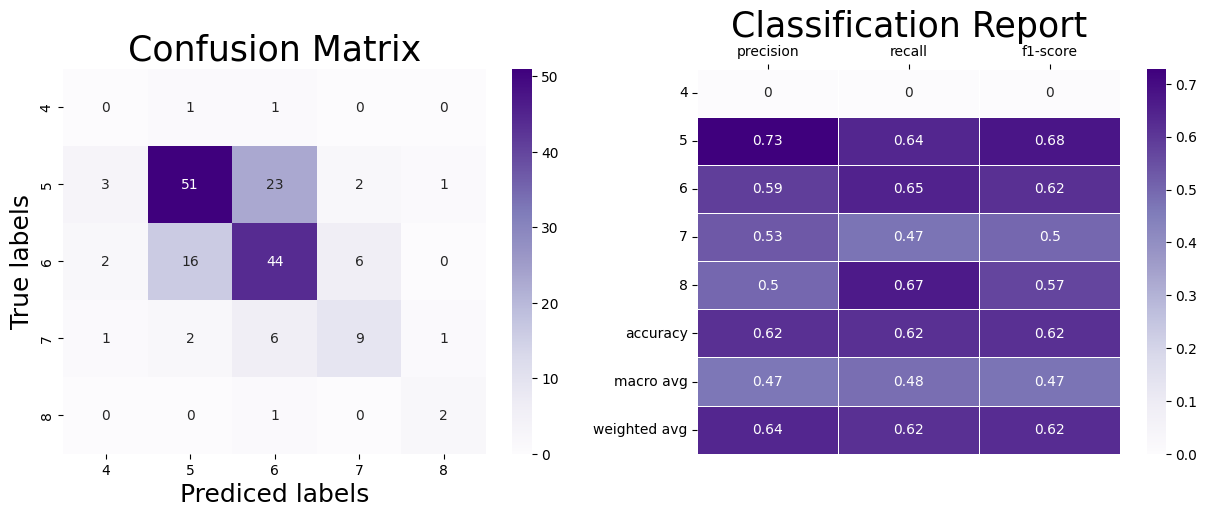

In [ ]:
clf_plot(y_pred_tree)

**Evaluasi Confusion Matrix**

- kelas 5 benar 57
- kelas 6	benar 31
- kelas 7 benar 4
- kelas 4 benar 0  
- kelas 8	benar 0

**Kinerja Umum Model**

- Akurasi keseluruhan: 53% → artinya hanya sekitar setengah dari prediksi yang tepat

- Macro avg dan Weighted avg f1-score:

1. Macro avg: 0.28 → menunjukkan bahwa model sangat lemah dalam memprediksi kelas minoritas (karena semua kelas diberi bobot sama).

2. Weighted avg: 0.53 → karena dipengaruhi oleh jumlah data di masing-masing kelas, terutama kelas mayoritas (kelas 5 dan 6).

## LogisticRegression

In [ ]:
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=6).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Tuned hyper parameters :  {'C': 0.01, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.532888380371218


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.576


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


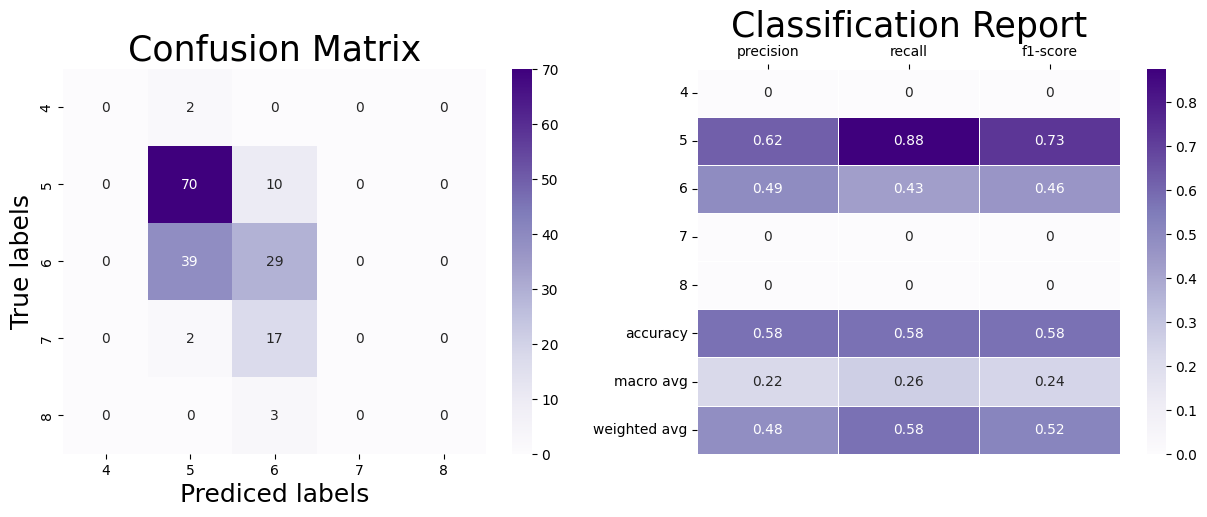

In [ ]:
clf_plot(y_pred_lr)

**Evaluasi Confusion Matrix**

- kelas 5 benar 70
- kelas 6	benar 29
- kelas 7 benar 0
- kelas 4 benar 0  
- kelas 8	benar 0

**Kinerja Umum Model**

- Akurasi keseluruhan: 57% → artinya hanya sekitar setengah dari prediksi yang tepat

- Macro avg dan Weighted avg f1-score:

1. Macro avg: 0.24 → menunjukkan bahwa model sangat lemah dalam memprediksi kelas minoritas (karena semua kelas diberi bobot sama).

2. Weighted avg: 0.52 → karena dipengaruhi oleh jumlah data di masing-masing kelas, terutama kelas mayoritas (kelas 5 dan 6).

## Result

In [ ]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LogisticRegression'],
    'Score' : [rf_score, knn_score, tree_score, lr_score]
})

result.sort_values(by='Score', inplace=True)

<ipython-input-49-a7e7b60f7671>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=result.Algorithm, rotation=300)


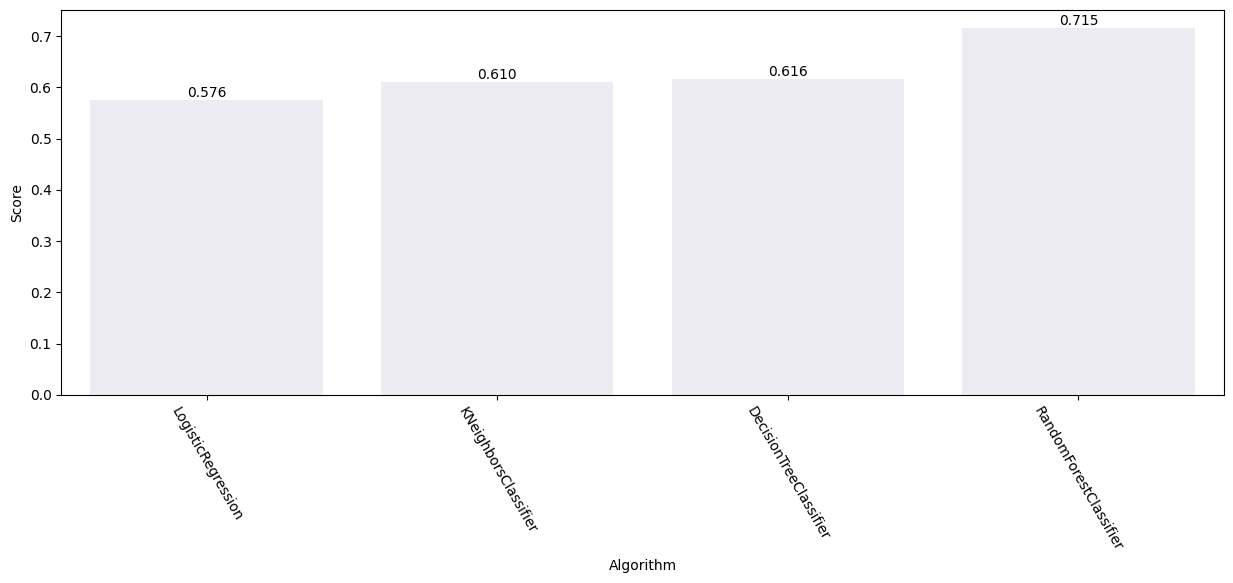

In [ ]:
sns.set_palette("Purples")
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

Berdasarkan dari grafik diatas, best algorithm base on Score adalah :
**RandomForestClassifier**

jadi, kita memilih **RandomForestClassifier**

## Final Modeling

In [ ]:
# Model
rf = RandomForestClassifier(**rf_cv.best_params_)

In [ ]:
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=150)

# **Deployment Model**

## Simpan Model dan Scaler


In [ ]:
import joblib

joblib.dump(MinMaxScaler().fit(X_temp), '/content/drive/MyDrive/scaler.pkl')
joblib.dump(rf, '/content/drive/MyDrive/classification_model.pkl')

['/content/drive/MyDrive/classification_model.pkl']

## Load Testing Data

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/data_testing.csv')
data_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222
1,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514
2,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417
3,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754
4,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516


In [ ]:
ids = data_test['Id']

memisahkan kolom Id agar tidak ikut diprediksi

In [ ]:
X_val = data_test.drop(columns=['Id'])

X_val.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

scaler = joblib.load('/content/drive/MyDrive/scaler.pkl')
X_val_scaled = scaler.transform(X_val)

nama kolom disesuaikan agar match dengan fitur saat training.

Memuat scaler yang sudah dilatih dari data train, lalu melakukan transformasi ke data testing.

## Predict

In [ ]:
model = joblib.load('/content/drive/MyDrive/classification_model.pkl')

In [ ]:
# Predict
y_test_pred = model.predict(X_val_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
output = pd.DataFrame({
    'Id': ids,
    'quality': y_test_pred
})

output.to_csv('/content/drive/MyDrive/hasilprediksi_010.csv', index=False)